In [0]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Simple Linear Regression with Synthetic Data

In this first Colab, you'll explore linear regression with a simple database. 

## Learning objectives:

After doing this exercise, you'll know how to do the following:

  * Run Colabs.
  * Tune the following [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpret different kinds of [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

## About Colabs

Machine Learning Crash Course uses Colaboratories (**Colabs**) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). Like all Jupyter Notebooks, a Colab consists of two kinds of components:

  * **Text cells**, which contain explanations. You are currently reading a text cell.
  * **Code cells**, which contain Python code for you to run. Code cells have a light gray background.

You *read* the text cells and *run* the code cells.

### Running code cells

You must run code cells in order. In other words, you may only run a code cell once all the code cells preceding it have already been run. 

To run a code cell:

  1. Place the cursor anywhere inside the [ ] area at the top left of a code cell. The area inside the [ ] will display an arrow.
  2. Click the arrow.

Alternatively, you may invoke **Runtime->Run all**. Note, though, that some of the code cells will fail because not all the coding is complete. (You'll complete the coding as part of the exercise.)

### Understanding hidden code cells

We've **hidden** the code in code cells that don't advance the learning objectives. For example, we've hidden the code that plots graphs. However, **you must still run code cells containing hidden code**. You'll know that the code is hidden because you'll see a title (for example, "Load the functions that build and train a model") without seeing the code.

To view the hidden code, just double click the header.

### Why did you see an error?

If a code cell returns an error when you run it, consider two common problems:

  * You didn't run *all* of the code cells preceding the current code cell.
  * If the code cell is labeled as a **Task**, then you haven't written the necessary code. 

## Use the right version of TensorFlow

The following hidden code cell ensures that the Colab will run on TensorFlow 2.X, which is the most recent version of TensorFlow:

In [1]:
#@title Run this Colab on TensorFlow 2.x
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


## Import relevant modules

The following cell imports the packages that the program requires:

In [3]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [4]:
print(tf.__version__)

2.5.0


## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [5]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [6]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [7]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

2021-07-30 12:42:06.975099: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-07-30 12:42:07.046653: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1/1 [==============================] - 0s 262ms/step - loss: 360.4083 - root_mean_squared_error: 18.9844
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 350.5753 - root_mean_squared_error: 18.7237
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 343.5733 - root_mean_squared_error: 18.5357
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 337.7880 - root_mean_squared_error: 18.3790
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 332.7089 - root_mean_squared_error: 18.2403
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 328.0998 - root_mean_squared_error: 18.1135
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 323.8292 - root_mean_squared_error: 17.9953
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 319.8155 - root_mean_squared_error: 17.8834
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 316.0039 - root_

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


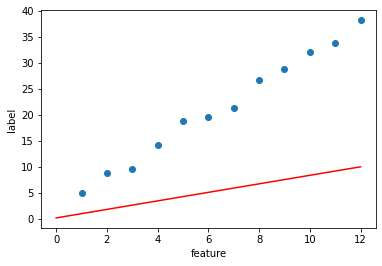

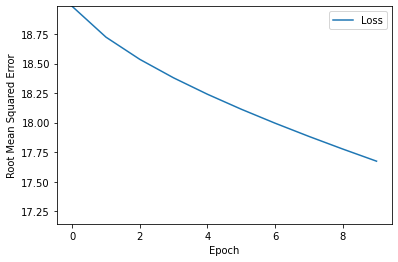

In [8]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
1/1 [==============================] - 0s 223ms/step - loss: 572.2314 - root_mean_squared_error: 23.9214
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 559.8193 - root_mean_squared_error: 23.6605
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 550.9462 - root_mean_squared_error: 23.4722
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 543.5944 - root_mean_squared_error: 23.3151
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 537.1250 - root_mean_squared_error: 23.1760
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 531.2420 - root_mean_squared_error: 23.0487
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 525.7807 - root_mean_squared_error: 22.9299
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 520.6387 - root_mean_squared_error: 22.8175
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 515.7476 - root_

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


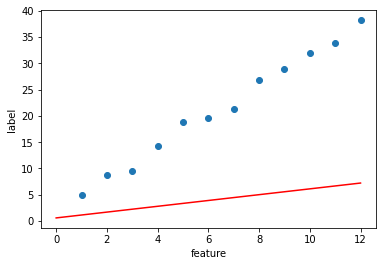

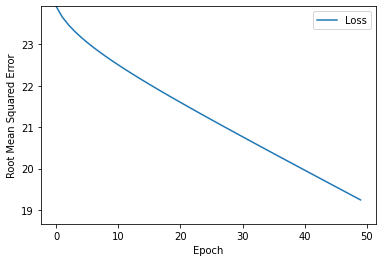

In [9]:
learning_rate=0.01
epochs= 50   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/450
1/1 [==============================] - 0s 230ms/step - loss: 1090.8486 - root_mean_squared_error: 33.0280
Epoch 2/450
1/1 [==============================] - 0s 3ms/step - loss: 1073.6830 - root_mean_squared_error: 32.7671
Epoch 3/450
1/1 [==============================] - 0s 3ms/step - loss: 1061.3617 - root_mean_squared_error: 32.5785
Epoch 4/450
1/1 [==============================] - 0s 2ms/step - loss: 1051.1228 - root_mean_squared_error: 32.4210
Epoch 5/450
1/1 [==============================] - 0s 2ms/step - loss: 1042.0907 - root_mean_squared_error: 32.2814
Epoch 6/450
1/1 [==============================] - 0s 3ms/step - loss: 1033.8595 - root_mean_squared_error: 32.1537
Epoch 7/450
1/1 [==============================] - 0s 3ms/step - loss: 1026.2031 - root_mean_squared_error: 32.0344
Epoch 8/450
1/1 [==============================] - 0s 2ms/step - loss: 1018.9812 - root_mean_squared_error: 31.9215
Epoch 9/450
1/1 [==============================] - 0s 2ms/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 708.9736 - root_mean_squared_error: 26.6266
Epoch 72/450
1/1 [==============================] - 0s 2ms/step - loss: 704.7048 - root_mean_squared_error: 26.5463
Epoch 73/450
1/1 [==============================] - 0s 3ms/step - loss: 700.4494 - root_mean_squared_error: 26.4660
Epoch 74/450
1/1 [==============================] - 0s 3ms/step - loss: 696.2073 - root_mean_squared_error: 26.3857
Epoch 75/450
1/1 [==============================] - 0s 3ms/step - loss: 691.9788 - root_mean_squared_error: 26.3055
Epoch 76/450
1/1 [==============================] - 0s 3ms/step - loss: 687.7635 - root_mean_squared_error: 26.2252
Epoch 77/450
1/1 [==============================] - 0s 3ms/step - loss: 683.5616 - root_mean_squared_error: 26.1450
Epoch 78/450
1/1 [==============================] - 0s 2ms/step - loss: 679.3730 - root_mean_squared_error: 26.0648
Epoch 79/450
1/1 [==============================] - 0s 3ms/step - loss: 675.1978 - ro

1/1 [==============================] - 0s 3ms/step - loss: 442.1841 - root_mean_squared_error: 21.0282
Epoch 142/450
1/1 [==============================] - 0s 2ms/step - loss: 438.8413 - root_mean_squared_error: 20.9485
Epoch 143/450
1/1 [==============================] - 0s 3ms/step - loss: 435.5116 - root_mean_squared_error: 20.8689
Epoch 144/450
1/1 [==============================] - 0s 3ms/step - loss: 432.1951 - root_mean_squared_error: 20.7893
Epoch 145/450
1/1 [==============================] - 0s 3ms/step - loss: 428.8917 - root_mean_squared_error: 20.7097
Epoch 146/450
1/1 [==============================] - 0s 3ms/step - loss: 425.6015 - root_mean_squared_error: 20.6301
Epoch 147/450
1/1 [==============================] - 0s 3ms/step - loss: 422.3244 - root_mean_squared_error: 20.5505
Epoch 148/450
1/1 [==============================] - 0s 2ms/step - loss: 419.0605 - root_mean_squared_error: 20.4710
Epoch 149/450
1/1 [==============================] - 0s 3ms/step - loss: 415.8

1/1 [==============================] - 0s 2ms/step - loss: 239.8319 - root_mean_squared_error: 15.4865
Epoch 212/450
1/1 [==============================] - 0s 3ms/step - loss: 237.4043 - root_mean_squared_error: 15.4079
Epoch 213/450
1/1 [==============================] - 0s 2ms/step - loss: 234.9897 - root_mean_squared_error: 15.3294
Epoch 214/450
1/1 [==============================] - 0s 2ms/step - loss: 232.5881 - root_mean_squared_error: 15.2508
Epoch 215/450
1/1 [==============================] - 0s 3ms/step - loss: 230.1994 - root_mean_squared_error: 15.1723
Epoch 216/450
1/1 [==============================] - 0s 3ms/step - loss: 227.8238 - root_mean_squared_error: 15.0938
Epoch 217/450
1/1 [==============================] - 0s 2ms/step - loss: 225.4611 - root_mean_squared_error: 15.0154
Epoch 218/450
1/1 [==============================] - 0s 3ms/step - loss: 223.1113 - root_mean_squared_error: 14.9369
Epoch 219/450
1/1 [==============================] - 0s 2ms/step - loss: 220.7

1/1 [==============================] - 0s 3ms/step - loss: 101.0259 - root_mean_squared_error: 10.0512
Epoch 282/450
1/1 [==============================] - 0s 2ms/step - loss: 99.4965 - root_mean_squared_error: 9.9748
Epoch 283/450
1/1 [==============================] - 0s 2ms/step - loss: 97.9796 - root_mean_squared_error: 9.8985
Epoch 284/450
1/1 [==============================] - 0s 2ms/step - loss: 96.4754 - root_mean_squared_error: 9.8222
Epoch 285/450
1/1 [==============================] - 0s 2ms/step - loss: 94.9838 - root_mean_squared_error: 9.7460
Epoch 286/450
1/1 [==============================] - 0s 3ms/step - loss: 93.5047 - root_mean_squared_error: 9.6698
Epoch 287/450
1/1 [==============================] - 0s 2ms/step - loss: 92.0383 - root_mean_squared_error: 9.5937
Epoch 288/450
1/1 [==============================] - 0s 2ms/step - loss: 90.5845 - root_mean_squared_error: 9.5176
Epoch 289/450
1/1 [==============================] - ETA: 0s - loss: 89.1432 - root_mean_squ

1/1 [==============================] - 0s 2ms/step - loss: 23.8952 - root_mean_squared_error: 4.8883
Epoch 352/450
1/1 [==============================] - 0s 2ms/step - loss: 23.2216 - root_mean_squared_error: 4.8189
Epoch 353/450
1/1 [==============================] - 0s 2ms/step - loss: 22.5596 - root_mean_squared_error: 4.7497
Epoch 354/450
1/1 [==============================] - 0s 2ms/step - loss: 21.9091 - root_mean_squared_error: 4.6807
Epoch 355/450
1/1 [==============================] - 0s 2ms/step - loss: 21.2702 - root_mean_squared_error: 4.6120
Epoch 356/450
1/1 [==============================] - 0s 2ms/step - loss: 20.6428 - root_mean_squared_error: 4.5434
Epoch 357/450
1/1 [==============================] - 0s 2ms/step - loss: 20.0268 - root_mean_squared_error: 4.4751
Epoch 358/450
1/1 [==============================] - 0s 2ms/step - loss: 19.4222 - root_mean_squared_error: 4.4071
Epoch 359/450
1/1 [==============================] - 0s 2ms/step - loss: 18.8290 - root_mean_s

1/1 [==============================] - 0s 2ms/step - loss: 1.7283 - root_mean_squared_error: 1.3146
Epoch 423/450
1/1 [==============================] - 0s 2ms/step - loss: 1.6986 - root_mean_squared_error: 1.3033
Epoch 424/450
1/1 [==============================] - 0s 3ms/step - loss: 1.6721 - root_mean_squared_error: 1.2931
Epoch 425/450
1/1 [==============================] - 0s 2ms/step - loss: 1.6485 - root_mean_squared_error: 1.2840
Epoch 426/450
1/1 [==============================] - 0s 2ms/step - loss: 1.6275 - root_mean_squared_error: 1.2757
Epoch 427/450
1/1 [==============================] - 0s 2ms/step - loss: 1.6087 - root_mean_squared_error: 1.2684
Epoch 428/450
1/1 [==============================] - 0s 2ms/step - loss: 1.5920 - root_mean_squared_error: 1.2617
Epoch 429/450
1/1 [==============================] - 0s 2ms/step - loss: 1.5770 - root_mean_squared_error: 1.2558
Epoch 430/450
1/1 [==============================] - 0s 2ms/step - loss: 1.5635 - root_mean_squared_er

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


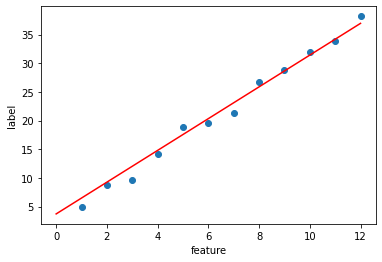

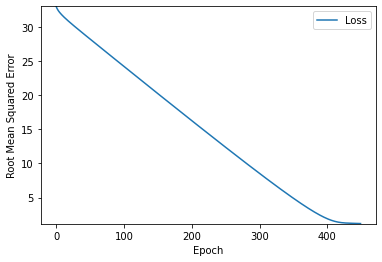

In [10]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/500
1/1 [==============================] - 0s 233ms/step - loss: 746.7671 - root_mean_squared_error: 27.3270
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 6674828.5000 - root_mean_squared_error: 2583.5688
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 739.6020 - root_mean_squared_error: 27.1956
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 4.2706 - root_mean_squared_error: 2.0666
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 1.1716 - root_mean_squared_error: 1.0824
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 1.1108 - root_mean_squared_error: 1.0539
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 1.0942 - root_mean_squared_error: 1.0461
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 1.0793 - root_mean_squared_error: 1.0389
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 1.0648 - root_me

1/1 [==============================] - 0s 2ms/step - loss: 158094.4844 - root_mean_squared_error: 397.6110
Epoch 72/500
1/1 [==============================] - 0s 2ms/step - loss: 120289.2578 - root_mean_squared_error: 346.8274
Epoch 73/500
1/1 [==============================] - 0s 3ms/step - loss: 99401.4766 - root_mean_squared_error: 315.2800
Epoch 74/500
1/1 [==============================] - 0s 3ms/step - loss: 90732.8516 - root_mean_squared_error: 301.2189
Epoch 75/500
1/1 [==============================] - 0s 2ms/step - loss: 91689.1953 - root_mean_squared_error: 302.8022
Epoch 76/500
1/1 [==============================] - 0s 2ms/step - loss: 101654.1484 - root_mean_squared_error: 318.8325
Epoch 77/500
1/1 [==============================] - 0s 2ms/step - loss: 121256.5391 - root_mean_squared_error: 348.2191
Epoch 78/500
1/1 [==============================] - 0s 2ms/step - loss: 150943.8281 - root_mean_squared_error: 388.5149
Epoch 79/500
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 2ms/step - loss: 171469.4219 - root_mean_squared_error: 414.0887
Epoch 140/500
1/1 [==============================] - 0s 2ms/step - loss: 169985.0781 - root_mean_squared_error: 412.2925
Epoch 141/500
1/1 [==============================] - 0s 2ms/step - loss: 168745.5156 - root_mean_squared_error: 410.7865
Epoch 142/500
1/1 [==============================] - 0s 3ms/step - loss: 167966.3281 - root_mean_squared_error: 409.8369
Epoch 143/500
1/1 [==============================] - 0s 2ms/step - loss: 167749.6406 - root_mean_squared_error: 409.5725
Epoch 144/500
1/1 [==============================] - 0s 2ms/step - loss: 168080.2969 - root_mean_squared_error: 409.9760
Epoch 145/500
1/1 [==============================] - 0s 2ms/step - loss: 168841.3594 - root_mean_squared_error: 410.9031
Epoch 146/500
1/1 [==============================] - 0s 3ms/step - loss: 169843.4531 - root_mean_squared_error: 412.1207
Epoch 147/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 170494.4375 - root_mean_squared_error: 412.9097
Epoch 207/500
1/1 [==============================] - 0s 2ms/step - loss: 170457.8906 - root_mean_squared_error: 412.8654
Epoch 208/500
1/1 [==============================] - 0s 2ms/step - loss: 170416.8906 - root_mean_squared_error: 412.8158
Epoch 209/500
1/1 [==============================] - 0s 2ms/step - loss: 170380.1094 - root_mean_squared_error: 412.7713
Epoch 210/500
1/1 [==============================] - 0s 3ms/step - loss: 170354.5469 - root_mean_squared_error: 412.7403
Epoch 211/500
1/1 [==============================] - 0s 3ms/step - loss: 170344.1250 - root_mean_squared_error: 412.7277
Epoch 212/500
1/1 [==============================] - 0s 2ms/step - loss: 170349.3594 - root_mean_squared_error: 412.7340
Epoch 213/500
1/1 [==============================] - 0s 2ms/step - loss: 170367.6406 - root_mean_squared_error: 412.7562
Epoch 214/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 170420.3906 - root_mean_squared_error: 412.8200
Epoch 274/500
1/1 [==============================] - 0s 4ms/step - loss: 170419.8594 - root_mean_squared_error: 412.8194
Epoch 275/500
1/1 [==============================] - 0s 3ms/step - loss: 170418.9688 - root_mean_squared_error: 412.8183
Epoch 276/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.8906 - root_mean_squared_error: 412.8170
Epoch 277/500
1/1 [==============================] - 0s 2ms/step - loss: 170416.8281 - root_mean_squared_error: 412.8157
Epoch 278/500
1/1 [==============================] - 0s 3ms/step - loss: 170416.0312 - root_mean_squared_error: 412.8148
Epoch 279/500
1/1 [==============================] - 0s 3ms/step - loss: 170415.7031 - root_mean_squared_error: 412.8144
Epoch 280/500
1/1 [==============================] - 0s 2ms/step - loss: 170415.7031 - root_mean_squared_error: 412.8144
Epoch 281/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 341/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 342/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 343/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 344/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 345/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 346/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 347/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 348/500
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 408/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.6875 - root_mean_squared_error: 412.8168
Epoch 409/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.6562 - root_mean_squared_error: 412.8167
Epoch 410/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 411/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.5781 - root_mean_squared_error: 412.8167
Epoch 412/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 413/500
1/1 [==============================] - 0s 3ms/step - loss: 170417.4375 - root_mean_squared_error: 412.8165
Epoch 414/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 415/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 170417.6875 - root_mean_squared_error: 412.8168
Epoch 475/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 476/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.6562 - root_mean_squared_error: 412.8167
Epoch 477/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 478/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 479/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.6562 - root_mean_squared_error: 412.8167
Epoch 480/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 481/500
1/1 [==============================] - 0s 2ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 482/500
1/1 [===========================

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


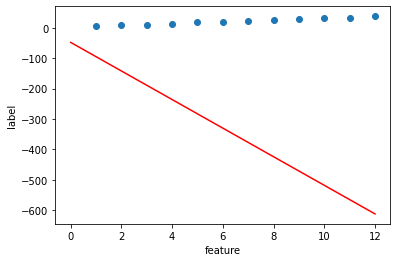

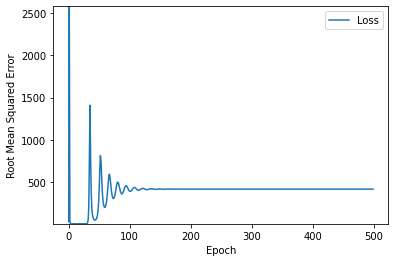

In [11]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
1/1 [==============================] - 0s 221ms/step - loss: 726.9919 - root_mean_squared_error: 26.9628
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 543.3962 - root_mean_squared_error: 23.3109
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 434.8067 - root_mean_squared_error: 20.8520
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 357.0490 - root_mean_squared_error: 18.8957
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 296.9863 - root_mean_squared_error: 17.2333
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 248.7010 - root_mean_squared_error: 15.7703
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 208.9480 - root_mean_squared_error: 14.4550
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 175.7245 - root_mean_squared_error: 13.2561
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 147.6904 - root_

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


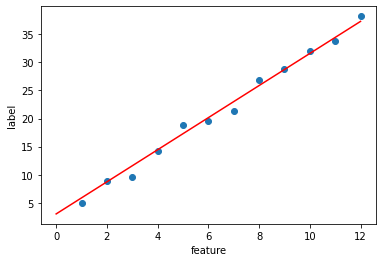

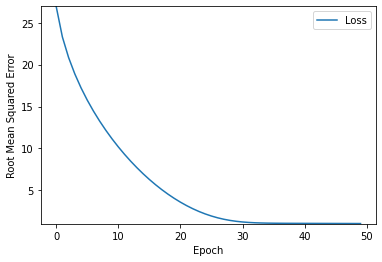

In [19]:
# Set the learning rate and number of epochs
learning_rate= .14  # Replace ? with a floating-point number
epochs= 50   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/70
1/1 [==============================] - 0s 228ms/step - loss: 394.2731 - root_mean_squared_error: 19.8563
Epoch 2/70
1/1 [==============================] - 0s 3ms/step - loss: 262.6384 - root_mean_squared_error: 16.2061
Epoch 3/70
1/1 [==============================] - 0s 3ms/step - loss: 191.2068 - root_mean_squared_error: 13.8278
Epoch 4/70
1/1 [==============================] - 0s 2ms/step - loss: 143.6319 - root_mean_squared_error: 11.9847
Epoch 5/70
1/1 [==============================] - 0s 3ms/step - loss: 109.3761 - root_mean_squared_error: 10.4583
Epoch 6/70
1/1 [==============================] - 0s 3ms/step - loss: 83.7373 - root_mean_squared_error: 9.1508
Epoch 7/70
1/1 [==============================] - 0s 4ms/step - loss: 64.1450 - root_mean_squared_error: 8.0091
Epoch 8/70
1/1 [==============================] - 0s 4ms/step - loss: 49.0112 - root_mean_squared_error: 7.0008
Epoch 9/70
1/1 [==============================] - 0s 4ms/step - loss: 37.2703 - root_mean_sq

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


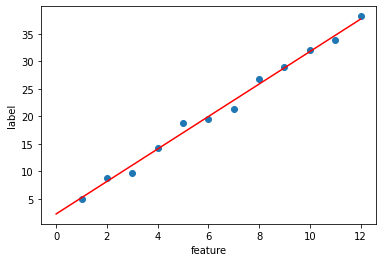

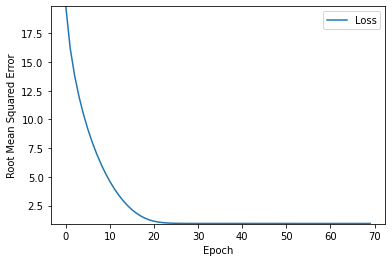

In [15]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
1/1 [==============================] - 0s 221ms/step - loss: 182.0566 - root_mean_squared_error: 13.4928
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 148.6239 - root_mean_squared_error: 12.1911
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 127.5587 - root_mean_squared_error: 11.2942
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 111.6881 - root_mean_squared_error: 10.5683
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 98.8364 - root_mean_squared_error: 9.9416
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 88.0154 - root_mean_squared_error: 9.3817
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 78.6819 - root_mean_squared_error: 8.8703
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 70.5007 - root_mean_squared_error: 8.3965
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 63.2485 - root_

1/1 [==============================] - 0s 3ms/step - loss: 0.9065 - root_mean_squared_error: 0.9521
Epoch 74/100
1/1 [==============================] - 0s 3ms/step - loss: 0.9052 - root_mean_squared_error: 0.9514
Epoch 75/100
1/1 [==============================] - 0s 2ms/step - loss: 0.9038 - root_mean_squared_error: 0.9507
Epoch 76/100
1/1 [==============================] - 0s 2ms/step - loss: 0.9024 - root_mean_squared_error: 0.9500
Epoch 77/100
1/1 [==============================] - 0s 2ms/step - loss: 0.9010 - root_mean_squared_error: 0.9492
Epoch 78/100
1/1 [==============================] - 0s 2ms/step - loss: 0.8996 - root_mean_squared_error: 0.9485
Epoch 79/100
1/1 [==============================] - 0s 2ms/step - loss: 0.8983 - root_mean_squared_error: 0.9478
Epoch 80/100
1/1 [==============================] - 0s 2ms/step - loss: 0.8969 - root_mean_squared_error: 0.9470
Epoch 81/100
1/1 [==============================] - 0s 3ms/step - loss: 0.8955 - root_mean_squared_error: 0.9

/Users/F445103/mlcc-exercises/jupyter-env/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


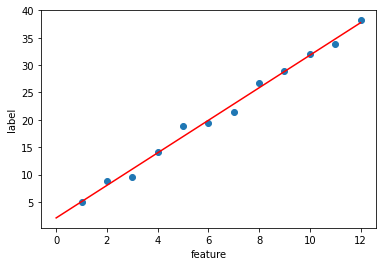

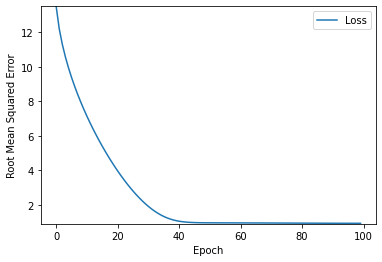

In [37]:
learning_rate=0.05
epochs=100
my_batch_size=1 # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [0]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the training loss too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.